In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_score, GridSearchCV, cross_validate, train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, roc_auc_score, roc_curve, auc
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, learning_curve, GridSearchCV, validation_curve

In [3]:
data1 = pd.read_csv("datasets/pulsar/pulsar_stars.csv", dtype=np.float32)
Y1 = np.array(data1.pop("target_class"))
X1 = np.array(data1)

data2 = pd.read_csv("datasets/mobile/train.csv")
Y2 = np.array(data2.pop("price_range"))
X2 = np.array(data2.copy())

In [102]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y1, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)

depth: 10
depth: 20
depth: 50
depth: 100
depth: 200
depth: 500


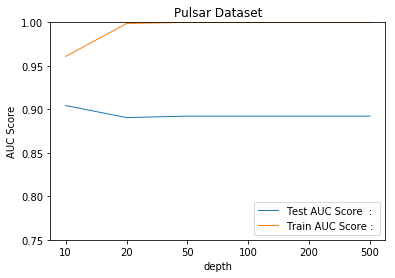

In [76]:
#non pruned tree
seed = 0
n_cv = 5
depth = [10, 20, 50, 100, 200, 500]
parameter_length = len(depth)
auc_test = [0] * parameter_length
auc_train = [0] * parameter_length

for i in range(parameter_length):
        print("depth:", depth[i])
        dt = DecisionTreeClassifier(random_state=seed, max_depth = depth[i])
        dt.fit(x_train_norm,y_train)
        y_pred_test = dt.predict(x_test_norm)
        y_pred_train = dt.predict(x_train_norm)
        auc_test[i] = roc_auc_score(y_test, y_pred_test)
        auc_train[i] = roc_auc_score(y_train, y_pred_train)

plt.plot(auc_test, linewidth=1, label="Test AUC Score  : ")
plt.plot(auc_train, linewidth=1, label="Train AUC Score : ")

plt.legend(loc='lower right')
plt.ylim(0.75, 1.0)
np.set_printoptions(precision=3)
plt.xticks(range(parameter_length),depth)
plt.xlabel("depth")
plt.ylabel("AUC Score")
plt.title("Pulsar Dataset")
plt.show()

depth: 10
depth: 20
depth: 50
depth: 100
depth: 200
depth: 500


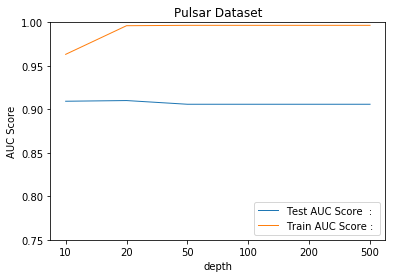

In [13]:
#pruned tree
seed = 0
n_cv = 5
depth = [10, 20, 50, 100, 200, 500]
parameter_length = len(depth)
auc_test = [0] * parameter_length
auc_train = [0] * parameter_length

for i in range(parameter_length):
        print("depth:", depth[i])
        dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6, max_depth = depth[i])
        dt.fit(x_train_norm,y_train)
        y_pred_test = dt.predict(x_test_norm)
        y_pred_train = dt.predict(x_train_norm)
        auc_test[i] = roc_auc_score(y_test, y_pred_test)
        auc_train[i] = roc_auc_score(y_train, y_pred_train)

plt.plot(auc_test, linewidth=1, label="Test AUC Score  : ")
plt.plot(auc_train, linewidth=1, label="Train AUC Score : ")

plt.legend(loc='lower right')
plt.ylim(0.75, 1.0)
np.set_printoptions(precision=3)
plt.xticks(range(parameter_length),depth)
plt.xlabel("depth")
plt.ylabel("AUC Score")
plt.title("Pulsar Dataset")
plt.show()

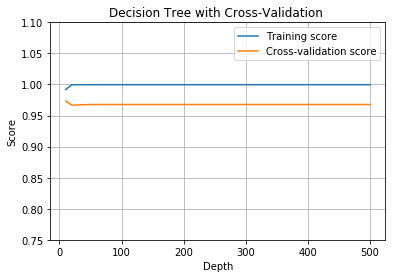

In [18]:
seed = 0
n_cv = 5
dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6)

train_scores, test_scores = validation_curve(dt, x_train_norm, y_train, param_name="max_depth", param_range=depth, cv=n_cv, n_jobs=-1)

plt.figure()
plt.plot(depth, np.mean(train_scores, axis=1), label='Training score')
plt.plot(depth, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Decision Tree with Cross-Validation ')
plt.xlabel('Depth')
plt.ylabel("Score")
plt.ylim(0.75, 1.1)
plt.legend(loc="best")
plt.grid()
plt.show()

Best parameters for Decision Tree:
{'max_depth': 10}
Accuracy score of Decision Tree with best parameters is 97.52%
ROC score of Decision Tree with best parameters is 90.93%
F1 score of Decision Tree with best parameters is 85.40%


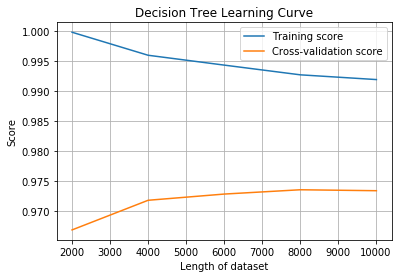

In [21]:
dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6)
parameters = {'max_depth' : depth}

clf = GridSearchCV(dt, param_grid=parameters, cv=n_cv, n_jobs=-1)

clf.fit(x_train_norm, y_train)
print("Best parameters for Decision Tree:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of Decision Tree with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('ROC score of Decision Tree with best parameters is %.2f%%' % (roc_auc_score(y_test, y_pred) * 100))
print('F1 score of Decision Tree with best parameters is %.2f%%' % (f1_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(clf, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("Decision Tree Learning Curve")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

In [103]:
#class balancing
dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6, class_weight = 'balanced')
parameters = {'max_depth' : depth}

clf = GridSearchCV(dt, param_grid=parameters, cv=n_cv, n_jobs=-1)

clf.fit(x_train_norm, y_train)
print("Best parameters for Decision Tree:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of Decision Tree with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))
print('ROC score of Decision Tree with best parameters is %.2f%%' % (roc_auc_score(y_test, y_pred) * 100))
print('F1 score of Decision Tree with best parameters is %.2f%%' % (f1_score(y_test, y_pred) * 100))

Best parameters for Decision Tree:
{'max_depth': 20}
Accuracy score of Decision Tree with best parameters is 96.72%
ROC score of Decision Tree with best parameters is 90.79%
F1 score of Decision Tree with best parameters is 82.81%


depth: 10
depth: 20
depth: 50
depth: 100
depth: 200
depth: 500


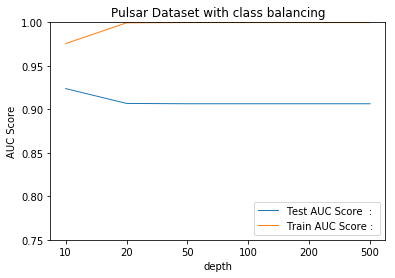

In [91]:

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic for decision tree')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [80]:
# Mobile dataset

In [81]:
X_train, X_test, y_train, y_test = train_test_split( X2, Y2, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)

depth: 1
depth: 2
depth: 3
depth: 4
depth: 5
depth: 6
depth: 7
depth: 8
depth: 9
depth: 10
depth: 11
depth: 12
depth: 13
depth: 14
depth: 15
depth: 16
depth: 17
depth: 18
depth: 19
depth: 20


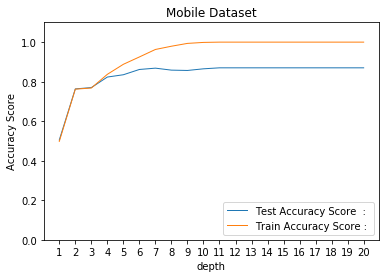

In [82]:
seed = 0
n_cv = 5
depth = [i+1 for i in range(20)]
parameter_length = len(depth)
acc_test = [0] * parameter_length
acc_train = [0] * parameter_length

for i in range(parameter_length):
        print("depth:", depth[i])
        dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6, max_depth = depth[i])
        dt.fit(x_train_norm,y_train)
        y_pred_test = dt.predict(x_test_norm)
        y_pred_train = dt.predict(x_train_norm)
        acc_test[i] = accuracy_score(y_test, y_pred_test)
        acc_train[i] = accuracy_score(y_train, y_pred_train)

plt.plot(acc_test, linewidth=1, label="Test Accuracy Score  : ")
plt.plot(acc_train, linewidth=1, label="Train Accuracy Score : ")

plt.legend(loc='lower right')
plt.ylim(0, 1.1)
np.set_printoptions(precision=3)
plt.xticks(range(parameter_length),depth)
plt.xlabel("depth")
plt.ylabel("Accuracy Score")
plt.title("Mobile Dataset")
plt.show()

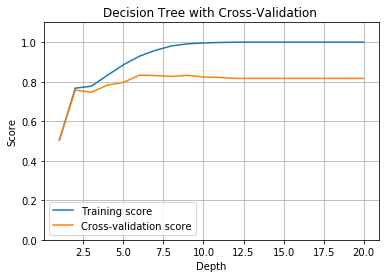

In [62]:
seed = 0
n_cv = 5
dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6)

train_scores, test_scores = validation_curve(dt, x_train_norm, y_train, param_name="max_depth", param_range=depth, cv=n_cv, n_jobs=-1)

plt.figure()
plt.plot(depth, np.mean(train_scores, axis=1), label='Training score')
plt.plot(depth, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Decision Tree with Cross-Validation ')
plt.xlabel('Depth')
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.legend(loc="best")
plt.grid()
plt.show()

Best parameters for Decision Tree:
{'max_depth': 6}
Accuracy score of Decision Tree with best parameters is 82.83%


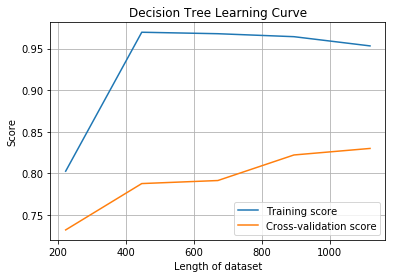

In [63]:
dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6)
parameters = {'max_depth' : depth}

clf = GridSearchCV(dt, param_grid=parameters, cv=n_cv, n_jobs=-1)

clf.fit(x_train_norm, y_train)
print("Best parameters for Decision Tree:")
print(clf.best_params_)
y_pred = clf.predict(x_test_norm)
print('Accuracy score of Decision Tree with best parameters is %.2f%%' % (accuracy_score(y_test, y_pred) * 100))

train_sizes=np.linspace(0.2, 1.0, 5)
train_sizes, train_scores, test_scores = learning_curve(clf, x_train_norm, y_train, cv=n_cv, train_sizes=train_sizes)

train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
plt.figure()
plt.title("Decision Tree Learning Curve")
plt.xlabel("Length of dataset")
plt.ylabel("Score")
plt.grid()
plt.plot(train_sizes, train_scores_mean, label="Training score")
plt.plot(train_sizes, test_scores_mean, label="Cross-validation score")
plt.legend(loc="best")
plt.show()

Confusion matrix, without normalization
[[136  14   0   0]
 [ 20 117  21   0]
 [  0  18 114  15]
 [  0   0  15 130]]


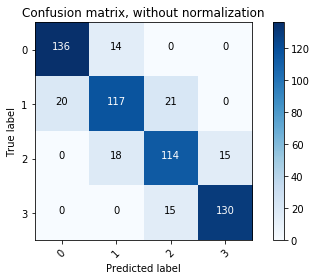

In [70]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=[0,1,2,3],
                      title='Confusion matrix, without normalization')
plt.show()

In [5]:
X_train, X_test, y_train, y_test = train_test_split( X1, Y1, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)
dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6, max_depth = 10)

%timeit dt.fit(x_train_norm, y_train)

%timeit dt.predict(x_train_norm)

64.8 ms ± 843 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
546 µs ± 8.64 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [6]:
X_train, X_test, y_train, y_test = train_test_split( X2, Y2, test_size = 0.3)
sc = StandardScaler()
x_train_norm = sc.fit_transform(X_train)
x_test_norm = sc.transform(X_test)
dt = DecisionTreeClassifier(random_state=seed, min_impurity_decrease = 1e-6, max_depth = 6)

%timeit dt.fit(x_train_norm, y_train)

%timeit dt.predict(x_train_norm)

5 ms ± 153 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
118 µs ± 2.72 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
